In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import pandas as pd # библиотека чтения таблиц

In [51]:
df = pd.read_csv('apt.csv', sep=';', encoding='Windows-1251') # загрузка таблички

In [52]:
df

,Названия,Соответствие,Запоминаемость,Благозвучие,Понятность,Оригинальность,Привлекательность,Выразительность,Возраст ЦА,Пол ЦА,Сфера бизнеса
0,Ригла (Москва),0,2,3,2,4,3,5,19,М,Реклама
1,Планета здоровья (Пермь),4,4,5,5,3,3,2,19,М,Реклама
2,Апрель (Краснодар),0,4,2,3,4,2,3,19,М,Реклама
3,Эркафарм (Москва),0,1,2,1,4,2,2,19,М,Реклама
4,Имплозия (Самара),0,3,3,3,4,2,2,19,М,Реклама
...,...,...,...,...,...,...,...,...,...,...,...
65,Таблеточка (Белгород),3,5,3,4,4,4,3,19,М,Реклама
66,Губернский лекарь (Барнаул),4,4,3,4,4,5,3,19,М,Реклама
67,Липецкфармация (Липецк),2,3,2,3,3,3,2,19,М,Реклама
68,Мособлмедсервис (Московская область),2,1,2,4,3,3,0,19,М,Реклама


In [53]:
df = df.drop(columns=['Пол ЦА', 'Сфера бизнеса']) # убрали два столбца, с которыми не собираемся работать

In [54]:
import re

df['Названия'] = df['Названия'].map(lambda s: re.sub(r'\([^()]*\)', '', s)) # убираем города из названий 

In [55]:
df

,Названия,Соответствие,Запоминаемость,Благозвучие,Понятность,Оригинальность,Привлекательность,Выразительность,Возраст ЦА
0,Ригла,0,2,3,2,4,3,5,19
1,Планета здоровья,4,4,5,5,3,3,2,19
2,Апрель,0,4,2,3,4,2,3,19
3,Эркафарм,0,1,2,1,4,2,2,19
4,Имплозия,0,3,3,3,4,2,2,19
...,...,...,...,...,...,...,...,...,...
65,Таблеточка,3,5,3,4,4,4,3,19
66,Губернский лекарь,4,4,3,4,4,5,3,19
67,Липецкфармация,2,3,2,3,3,3,2,19
68,Мособлмедсервис,2,1,2,4,3,3,0,19


In [56]:
df['sum'] = df.loc[:, 'Соответствие':'Выразительность'].sum(axis=1) # подсчитываем сумму баллов

In [57]:
# разделяем на 4 класса 
# метки классов: [0, 1, 2, 3]
# логика: если сумма баллов меньше 10, то это "очень плохо"/0; если сумма находится в промежутке от 10 до 15, то это "норм"/1;  
# если от 15 до 20, то "хорошо"/2; а если больше, то класс "феерично прекрасно"/3.

df['label'] = 0
for j in df['sum'].index.tolist():
    if (df['sum'][j]<=10):
      df['label'][j] = 0
    elif (df['sum'][j] > 10) & (df['sum'][j] <=15):
      df['label'][j]  = 1
    elif (df['sum'][j]>15) & (df['sum'][j]<=20):
      df['label'][j]  = 2
    else: 
      df['label'][j] = 3

In [58]:
df

,Названия,Соответствие,Запоминаемость,Благозвучие,Понятность,Оригинальность,Привлекательность,Выразительность,Возраст ЦА,sum,label
0,Ригла,0,2,3,2,4,3,5,19,19,2
1,Планета здоровья,4,4,5,5,3,3,2,19,26,3
2,Апрель,0,4,2,3,4,2,3,19,18,2
3,Эркафарм,0,1,2,1,4,2,2,19,12,1
4,Имплозия,0,3,3,3,4,2,2,19,17,2
...,...,...,...,...,...,...,...,...,...,...,...
65,Таблеточка,3,5,3,4,4,4,3,19,26,3
66,Губернский лекарь,4,4,3,4,4,5,3,19,27,3
67,Липецкфармация,2,3,2,3,3,3,2,19,18,2
68,Мособлмедсервис,2,1,2,4,3,3,0,19,15,1


In [59]:
# превращаем тексты в вектора

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(list(df['Названия']))

vecname = vectorizer.transform(df['Названия']).toarray()


In [60]:
# кластерный анализ

from sklearn.cluster import KMeans

k = 4
km = KMeans(n_clusters=k, random_state=1)
km.fit(df.drop('Названия', 1))
labels=km.labels_

df['claster'] = km.labels_ #и тоже вносим как один из столбцов информацию про кластера

In [61]:
df

,Названия,Соответствие,Запоминаемость,Благозвучие,Понятность,Оригинальность,Привлекательность,Выразительность,Возраст ЦА,sum,label,claster
0,Ригла,0,2,3,2,4,3,5,19,19,2,1
1,Планета здоровья,4,4,5,5,3,3,2,19,26,3,0
2,Апрель,0,4,2,3,4,2,3,19,18,2,1
3,Эркафарм,0,1,2,1,4,2,2,19,12,1,1
4,Имплозия,0,3,3,3,4,2,2,19,17,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65,Таблеточка,3,5,3,4,4,4,3,19,26,3,0
66,Губернский лекарь,4,4,3,4,4,5,3,19,27,3,0
67,Липецкфармация,2,3,2,3,3,3,2,19,18,2,1
68,Мособлмедсервис,2,1,2,4,3,3,0,19,15,1,1


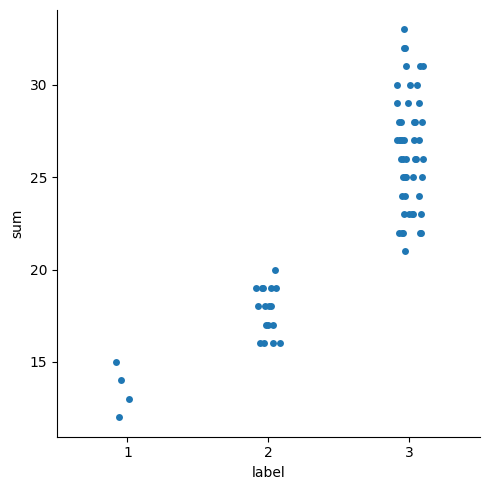

In [62]:
# визуализируем данные (информация по разметке на 4 класса)
import seaborn as sns

sns.catplot(x='label',
            y='sum',
            data=df);
     

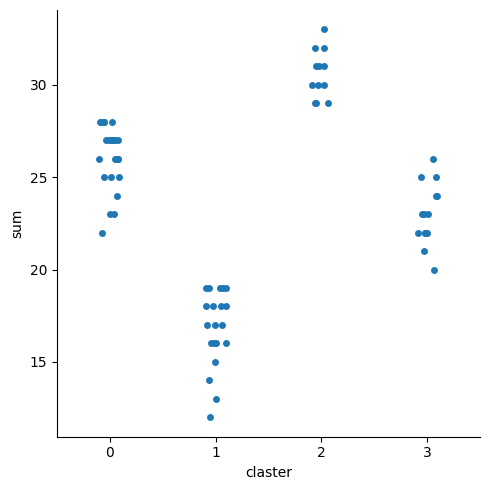

In [63]:
# визуализируем данные (информация по разбивке на 4 кластера)

sns.catplot(x='claster',
            y='sum',
            data=df);

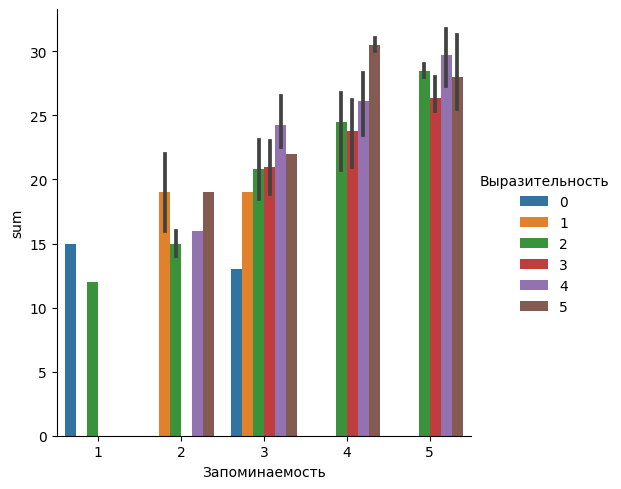

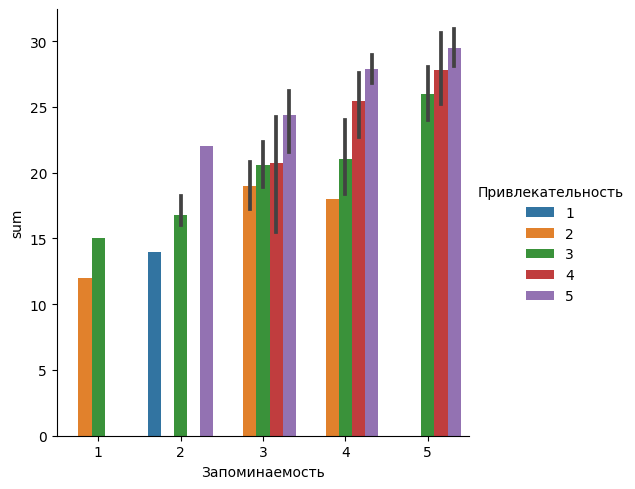

In [64]:
# можно смотреть взаимосвязь двух параметров

sns.catplot(x='Запоминаемость',
            y='sum',
            hue='Выразительность',
            kind='bar',
            data=df);



sns.catplot(x='Запоминаемость',
            y='sum',
            hue='Привлекательность',
            kind='bar',
            data=df);

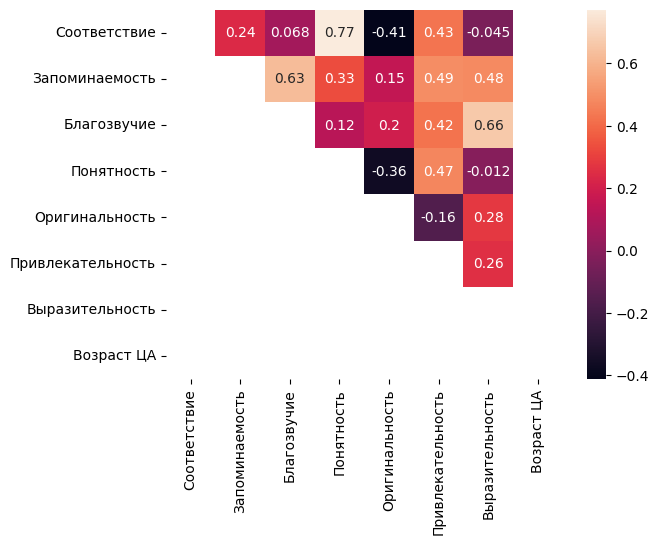

In [68]:
# строим матрицу корреляций 


import numpy as np

mask = np.tril(df.drop(columns=['sum', 'label', 'claster']).corr()) # для этой матрицы нам не нужны кластеры, классы и сумма баллов - поэтому мы их убрали
sns.heatmap(df.drop(columns=['sum', 'label', 'claster']).corr(), annot=True, mask=mask);

In [69]:
# все, что было ДО - разведка данных, на этом основании можно писать отчет про видимые закономерности
# ниже обучаем мл-модель классифицировать наши тексты
#
#для начала данные разделяются на матрицу Х (там содержатся все признаки и сами тексты) и y (это столбец с классами)

In [70]:
X = df.drop('label', 1)
y = df['label']

In [72]:
# делим данные на обучающую и тестовую выборки (70 на 30 соотношение)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X.drop('Названия', 1),
    y, test_size=0.3)

In [73]:
# один из алгоритмов классификации, подробнее можно почитать тут https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='ball_tree',leaf_size=30, metric='minkowski', metric_params=None,
n_neighbors=1, p=2, weights='uniform')

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_valid)

In [74]:
# подсчет метрики качества модели

from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_valid, pred_knn)
score_knn

0.9047619047619048

In [75]:
# еще один метод классификации
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(splitter='best', max_leaf_nodes=10, max_depth=15, 
                              min_samples_split=5, random_state=123)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_valid)

In [76]:
# подсчет метрики качества модели

score_tree = accuracy_score(y_valid, pred_tree)
score_tree

0.9523809523809523

In [92]:
# еще один метод классификации

X, y = df[["Названия"]], df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(ngram_range=(1,2))

X_train_vec = vectorizer.fit_transform(X_train["Названия"])
X_test_vec = vectorizer.transform(X_test["Названия"])

mnb = MultinomialNB()
mnb.fit(X_train_vec,y_train)
mnb_prediction = mnb.predict(X_test_vec)

In [93]:
accuracy_score(y_test, mnb_prediction)

0.6666666666666666

In [94]:
# еще один метод классификации (один из самых часто используемых - логистическая регрессия)

from sklearn. linear_model import LogisticRegression
from sklearn import metrics

log_regression = LogisticRegression()
log_regression.fit(X_train_vec,y_train)
y_pred = log_regression.predict(X_test_vec)


In [91]:
accuracy_score(y_test, y_pred)

0.7142857142857143